2023WS_41114

<h1><strong>Assignement 6</strong></h1>

<h3>Goal</h3>
In this assignment we use our knowledge in matplotlib[1], numpy[2] and pandas[3] to parse and compute environmental data captured by Canadas National Air Pollution Survaillance (NAPS)[4]. 
This data contains information about the hourly concentrations of ozone($O_{3}$) and nitrogen dioxide($NO_{2}$) recorded at five Stations in hourly Intervals.
We will import and normalize this data and plot the result. After this we will create a prediction model to make predictions about future values[5]. And lastly we will compute the root-mean-square error[6] of the model we created, to see how close the predicted values are to the recorded ones.

<h3>Task 1</h3>
In this task we parse the provided datasheets containing the recorded air pollution values. After this we merge all datasheets into one pandas dataframe.

<h4>Libraries</h4>
<p>For this we first have to import the required python libraries:</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

<h4>Data import and normalization</h4>
<p>Now we can import the data from Toronto2020_Station_1.csv, Toronto2020_Station_2.csv, Toronto2020_Station_3.csv, Toronto2020_Station_4.csv, Toronto2020_Station_5.csv. <br>
For this we save all Station names to a list labelled station_data_names. </p>

In [2]:
station_data_names = ['Toronto2020_Station_1.csv',
              'Toronto2020_Station_2.csv',
              'Toronto2020_Station_3.csv',
              'Toronto2020_Station_4.csv',
              'Toronto2020_Station_5.csv']

<p>We read each of these .csv files and append their data to a list labelled combined_toronto_data.
<br>
This list shows the hourly recorded values for ozone($O_{3}$) and nitrogen dioxide($NO_{2}$) in parts-per-billion (ppb) for each of the five stations.</p>

In [3]:
combined_toronto_data = []

for station in station_data_names:
    station_df = pd.read_csv(station, parse_dates=['Time'])
    combined_toronto_data.append(station_df)
combined_toronto_data

[                          Time  station 1 O3  station 1 NO2
 0    2020-01-01 00:00:00+00:00          27.0            6.0
 1    2020-01-01 01:00:00+00:00          27.0            6.0
 2    2020-01-01 02:00:00+00:00          27.0            6.0
 3    2020-01-01 03:00:00+00:00           NaN            NaN
 4    2020-01-01 04:00:00+00:00          26.0            6.0
 ...                        ...           ...            ...
 1435 2020-02-29 19:00:00+00:00          15.0           25.0
 1436 2020-02-29 20:00:00+00:00           8.0           33.0
 1437 2020-02-29 21:00:00+00:00           8.0           35.0
 1438 2020-02-29 22:00:00+00:00          10.0           33.0
 1439 2020-02-29 23:00:00+00:00           2.0           41.0
 
 [1440 rows x 3 columns],
                           Time  station 2 O3  station 2 NO2
 0    2020-01-01 00:00:00+00:00          27.0            7.0
 1    2020-01-01 01:00:00+00:00          27.0            7.0
 2    2020-01-01 02:00:00+00:00          28.0            

<p>After appending all files, we create a pandas dataframe labelled merged_data. This dataframe merges all entries from the former list on their timestamp. This means that we now have a table organized by time, where each station's recordings are listed next to each other.</p>

In [4]:
merged_data = combined_toronto_data[0]
for df in combined_toronto_data[1:]:
    merged_data = pd.merge(merged_data, df, on='Time', how='outer')

merged_data['Time'] = pd.to_datetime(df['Time'])
merged_data

,Time,station 1 O3,station 1 NO2,station 2 O3,station 2 NO2,station 3 O3,station 3 NO2,station 4 O3,station 4 NO2,station 5 O3,station 5 NO2
0,2020-01-01 00:00:00+00:00,27.0,6.0,27.0,7.0,26.0,5.0,23.0,9.0,29,4.0
1,2020-01-01 01:00:00+00:00,27.0,6.0,27.0,7.0,26.0,5.0,22.0,10.0,28,5.0
2,2020-01-01 02:00:00+00:00,27.0,6.0,28.0,6.0,25.0,5.0,24.0,9.0,29,5.0
3,2020-01-01 03:00:00+00:00,NaN,NaN,28.0,5.0,26.0,5.0,25.0,7.0,27,6.0
4,2020-01-01 04:00:00+00:00,26.0,6.0,29.0,5.0,28.0,4.0,27.0,4.0,27,6.0
...,...,...,...,...,...,...,...,...,...,...,...
1435,2020-02-29 19:00:00+00:00,15.0,25.0,28.0,16.0,31.0,11.0,20.0,26.0,20,19.0
1436,2020-02-29 20:00:00+00:00,8.0,33.0,20.0,24.0,29.0,12.0,12.0,34.0,21,21.0
1437,2020-02-29 21:00:00+00:00,8.0,35.0,19.0,24.0,28.0,14.0,10.0,34.0,22,20.0
1438,2020-02-29 22:00:00+00:00,10.0,33.0,13.0,32.0,19.0,25.0,9.0,37.0,20,20.0


<h3>Task 2</h3>
<p>In task 2 we simplify our previously generated dataframe merged_data, by calculating the hourly mean of each the $O_{3}$ and $NO_{2}$ values. After that we smooth our results even further by computing a rolling average with a window of 24 hours. <br>
Finally we plot our results using matplotlib.</p>


<h4>Calculating the mean values and rolling averages [7]</h4>
<p>First we create a pandas dataframe where we store the time, the hourly mean of $O_{3}$ concentration and the hourly mean of $NO_{2}$ concentration. We again save the names of all colums to one list for $O_{3}$ values and one list for $NO_{2}$ values each.</p>

In [5]:
hourly_data = pd.DataFrame(columns = ['Time','O3 hourly mean', 'NO2 hourly mean'])

o3_columns = ['station 1 O3',
              'station 2 O3',
              'station 3 O3',
              'station 4 O3',
              'station 5 O3']
no2_columns = ['station 1 NO2',
              'station 2 NO2',
              'station 3 NO2',
              'station 4 NO2',
              'station 5 NO2']

<p>After that we iterate over each row in our merged_data dataframe and calculate the mean of $O_{3}$ and $NO_{2}$ concentration between all stations at each timestamp. We save this data to the dataframe hourly data.</p>

In [6]:
for index, row in merged_data.iterrows():
    
    time = row['Time']
    o3_hourly_values = row[o3_columns].mean()
    no2_hourly_values = row[no2_columns].mean()

    hourly_data.loc[len(hourly_data)] = [time, o3_hourly_values, no2_hourly_values]
    
    
hourly_data

,Time,O3 hourly mean,NO2 hourly mean
0,2020-01-01 00:00:00+00:00,26.4,6.20
1,2020-01-01 01:00:00+00:00,26.0,6.60
2,2020-01-01 02:00:00+00:00,26.6,6.20
3,2020-01-01 03:00:00+00:00,26.5,5.75
4,2020-01-01 04:00:00+00:00,27.4,5.00
...,...,...,...
1435,2020-02-29 19:00:00+00:00,22.8,19.40
1436,2020-02-29 20:00:00+00:00,18.0,24.80
1437,2020-02-29 21:00:00+00:00,17.4,25.40
1438,2020-02-29 22:00:00+00:00,14.2,29.40


<p>Now that we have our dataframe with the hourly meanvalues, we want to smooth our results by implementing them as a rolling average. We use pandas builtin function .rolling() for this and select a timewindow of 24 hours.</p>

In [7]:
rolling_averages = pd.DataFrame()

rolling_averages['Time'] = hourly_data['Time']
rolling_averages['O3 rolling average']= hourly_data['O3 hourly mean'].rolling(window = 24, min_periods=None).mean()
rolling_averages['NO2 rolling average']= hourly_data['NO2 hourly mean'].rolling(window = 24, min_periods=None).mean()

rolling_averages

,Time,O3 rolling average,NO2 rolling average
0,2020-01-01 00:00:00+00:00,NaN,NaN
1,2020-01-01 01:00:00+00:00,NaN,NaN
2,2020-01-01 02:00:00+00:00,NaN,NaN
3,2020-01-01 03:00:00+00:00,NaN,NaN
4,2020-01-01 04:00:00+00:00,NaN,NaN
...,...,...,...
1435,2020-02-29 19:00:00+00:00,25.133333,12.391667
1436,2020-02-29 20:00:00+00:00,24.975000,12.675000
1437,2020-02-29 21:00:00+00:00,24.850000,12.925000
1438,2020-02-29 22:00:00+00:00,24.341667,13.591667


<h4>Plotting the results</h4>
<p>Finally after having a complete and smoothed dataframe we can plot our results using matplotlib. Our plot shows the rolling averages of $O_{3}$ and $NO_{2}$ concentrations over time.</p>

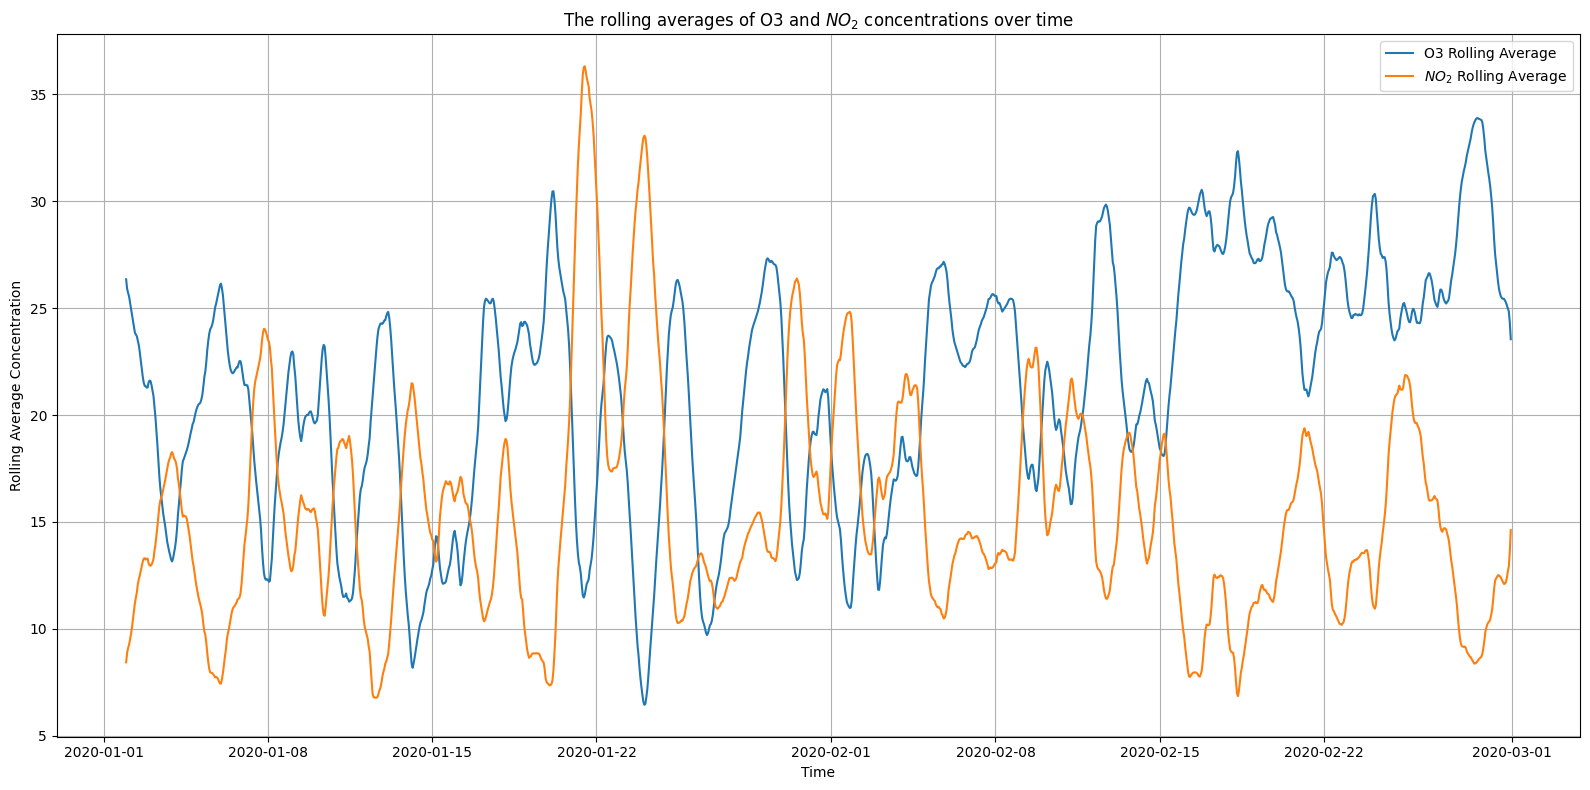

In [34]:
plt.figure(figsize=(16,8))

plt.plot(rolling_averages['Time'], rolling_averages['O3 rolling average'], label='O3 Rolling Average')
plt.plot(rolling_averages['Time'], rolling_averages['NO2 rolling average'], label='$NO_{2}$ Rolling Average')

plt.title('The rolling averages of O3 and $NO_{2}$ concentrations over time')
plt.xlabel('Time')
plt.ylabel('Rolling Average Concentration')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

<h3>Task 3</h3>
<p>In task 3 we create a 2-degree prediction model for the hourly mean of $NO_{2}$ and $O_{3}$ concentration. It will take the $NO_{2}$ concentration and calculate the predicted $O_{3}$ concentrations. We then compare the predicted data against the actual recorded data by plotting them. </p>

<h4>Calculating a 2 dimensional polynomial</h4>
<p>To calculate a polynomial abstraction of our data we use numpy's builtin poly functions. To be able to use them they require a normalized dataset, where all empty values have been dropped.
<br>We do this by calling pandas .dropna() function and using it on the $O_{3}$ and $NO_{2}$ hourly mean subsets.
We then save each subset to an according list labelled o3_data and no2_data. </p>

In [9]:
hourly_data = hourly_data.dropna(subset=['O3 hourly mean', 'NO2 hourly mean'])
o3_data = hourly_data['O3 hourly mean'].values
no2_data = hourly_data['NO2 hourly mean'].values

<p>Now that we have our values in normalized pythonlists, we can start constructing our polynomial functions. <br>
We do this in two steps: The first step uses numpy's builtin function .polyfit() to determine the coefficients of our future polynom. For this we pass our no2_data and o3_data list and an integer to determine the future polynomials degree. In our case 2.</p>

In [10]:
coefficients = np.polyfit(no2_data, o3_data, 2)
coefficients

array([ 8.31203725e-03, -1.17932792e+00,  3.69984290e+01])

<p>After calculating our coefficients we can calculate our polynomial equation. This we do by using numpy's builtin function .poly1d(). It uses our calculated coefficients and parses them into a in python usable polynomial function we label poly_equation.</p>

In [11]:
poly_equation = np.poly1d(coefficients)

print(f'We receive the polynomial equation:\n {poly_equation}')

We receive the polynomial equation:
           2
0.008312 x - 1.179 x + 37


<p>With x = $NO_{2}$, we receive the following polynomial equation:
</p>
$$O_{3}(x)=0.008312x^2-1.179x+37$$

<p>Now that we have our polynomial function we can compute values with it and make predictions about future $O_{3}$ values.<br>
We generate 100 equally spaced values in the valuerange of our $NO_{2}$ data. We put those values in our poly_equation and receive a numpyarray of predicted $O_{3}$ values.</p>

In [12]:
no2_values_for_equation = np.linspace(min(no2_data), max(no2_data), 100)
o3_predicted_values = poly_equation(no2_values_for_equation)
o3_predicted_values

array([ 3.28605725e+01,  3.22793434e+01,  3.17026304e+01,  3.11304335e+01,
        3.05627528e+01,  2.99995882e+01,  2.94409397e+01,  2.88868074e+01,
        2.83371911e+01,  2.77920910e+01,  2.72515071e+01,  2.67154393e+01,
        2.61838876e+01,  2.56568520e+01,  2.51343326e+01,  2.46163293e+01,
        2.41028421e+01,  2.35938710e+01,  2.30894161e+01,  2.25894774e+01,
        2.20940547e+01,  2.16031482e+01,  2.11167578e+01,  2.06348835e+01,
        2.01575254e+01,  1.96846834e+01,  1.92163575e+01,  1.87525478e+01,
        1.82932542e+01,  1.78384767e+01,  1.73882154e+01,  1.69424702e+01,
        1.65012411e+01,  1.60645281e+01,  1.56323313e+01,  1.52046506e+01,
        1.47814860e+01,  1.43628376e+01,  1.39487053e+01,  1.35390891e+01,
        1.31339891e+01,  1.27334052e+01,  1.23373374e+01,  1.19457858e+01,
        1.15587502e+01,  1.11762309e+01,  1.07982276e+01,  1.04247405e+01,
        1.00557695e+01,  9.69131461e+00,  9.33137588e+00,  8.97595327e+00,
        8.62504680e+00,  

<h4>Plotting the results</h4>
<p>After receiving the numpyarray we can plot our results using matplotlib.<br>
We use a scatterplot to display the actual recorded data and overlay it with our calculated polynomial curve to see how close the approximation is.
</p>

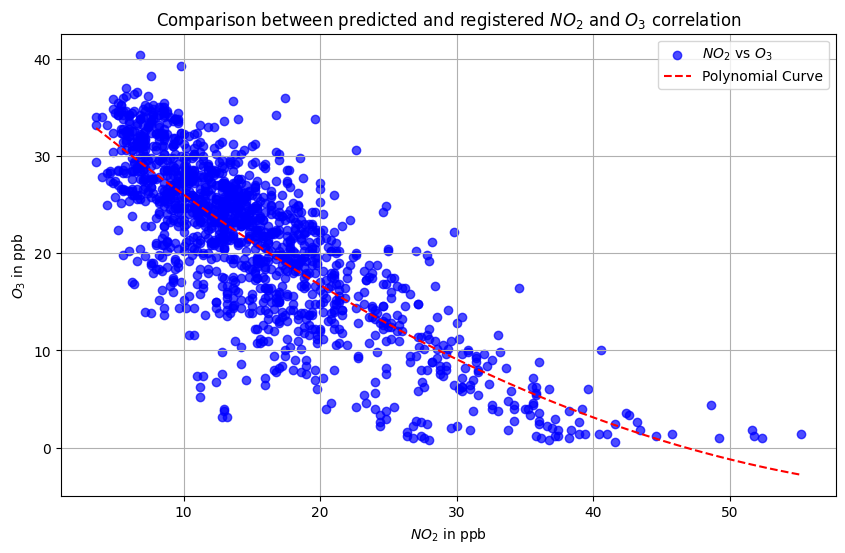

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(no2_data, o3_data, label='$NO_{2}$ vs $O_{3}$', color='blue', alpha=0.7)
plt.plot(no2_values_for_equation, o3_predicted_values, label='Polynomial Curve', color='red', linestyle='--')
plt.title('Comparison between predicted and registered $NO_{2}$ and $O_{3}$ correlation')
plt.xlabel('$NO_{2}$ in ppb')
plt.ylabel('$O_{3}$ in ppb')
plt.legend()
plt.grid(True)

plt.show()

<h3>Task 4</h3>
<p>In Task 4 we implement a python function that computes the root-mean-square error between our experimental and theoretical values. We then compute our values to see how accurate our polynomial is.</p>

<h4>Definition Root-Mean-Square Error</h4>
<p>A root-mean-square error is a value that states how close a apporximated polynom is to the actual data.<br>
It is defined as follows:</p>

$$RMSE=\sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( X_i (\text{Theoretical}) - Y_i (\text{Experiment}) \right)^2}$$

<p>The closer the root-mean-square error is to zero the more accurate the polynom is.</p>

<h4>Python implementation</h4>
<p>We implement the function as follows:</p>

In [31]:
def root_mean_square_error(theoreticalValues: np.ndarray, experimentalValues: np.ndarray):
    """This funciton calculates the root-mean-square error between two provided lists.
        The first list holds the theoretical calculated values and the other one the real
        experimental values.
    :param theoreticalValues: list, list of theoretical values that were generated by using
                               a polynomial function 
    :param experimentalValues: list, list of experimental values that were obtained, by 
                               measuring in a real world experiment.
    
    :return: float, the root-mean-square error between the two provided lists
                    it can be used to judge how accurate the polynomial that generated the
                    theoretical values is.
    """
    #Typechecks
    if not isinstance(theoreticalValues, np.ndarray):
        raise TypeError('You must provide theoreticalValues as a numpy.ndarray')
    elif not isinstance(theoreticalValues, np.ndarray):
        raise TypeError('You must provide theoreticalValues as a numpy.ndarray')
    else:
        values = 0
        values_length=len(theoreticalValues)
        for i in range(0,values_length ):
            values += (theoreticalValues[i] - experimentalValues[i])**2
           
    return (1/values_length * values)**0.5

<h4>Calculating the Root-Mean-Square Error</h4>
<p>Now that we have a working python implementation to calcuate the root-mean-square error we can calculate it seperately for every stationdata.
<br> 
We do this normalizing our pandas dataframe merged_data which holds all stationdata in seperate columns and iterating over each column and calculating the root-mean-square error:</p>

In [32]:
merged_data = merged_data.dropna(ignore_index=True)
average_rmse = 0
for i in range(1,6):
    o3_values = poly_equation(merged_data['station '+str(i)+ ' NO2'])
    rmse = root_mean_square_error(o3_values,merged_data['station '+str(i)+' O3'].values)
    average_rmse += rmse
    print(f'The root-mean-square error between our calculated polynomial '\
          f'function and the recorded data of station {str(i)} is: {rmse} ppb.')

print(f'\nThe average root-mean-square error between our calculated polynomial' \
      f'and all 5 stations is: {average_rmse/5}')

The root-mean-square error between our calculated polynomial function and the recorded data of station 1 is: 4.993479063403626 ppb.
The root-mean-square error between our calculated polynomial function and the recorded data of station 2 is: 5.216227303444568 ppb.
The root-mean-square error between our calculated polynomial function and the recorded data of station 3 is: 5.064567965779078 ppb.
The root-mean-square error between our calculated polynomial function and the recorded data of station 4 is: 5.361799288276782 ppb.
The root-mean-square error between our calculated polynomial function and the recorded data of station 5 is: 5.21082683170303 ppb.

The average root-mean-square error between our calculated polynomialand all 5 stations is: 5.169380090521417


<h3>Conclusion</h3>
<p>
With an average root-mean-square error of about 5.12 $O_{3}$ pps our polynom is reasonably accurate to apporixmate either missing or future values. It shouldn't be used as clear data because especially future data can change a lot due to external factors like human influence on the environment. But it can be used to approximate a general trend and for abstraction in calculations like ours.
    
In this exercise we refined our knowledge of the python libraries pandas, matplotlib and numpy. We learned how to calculate polynomial equations from a given dataset and how to calculate the Root-Mean-Square Error to judge how accurate the resulting polynomial is.
</p>

<h3>References</h3>
<ol>
<li>
J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007
</li>
<li>
Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362,2020    
</li>
<li>
McKinney, Proceedings of the 9th Python in Science Conference, Volume 445, 2010 (https://conference.scipy.org/proceedings/scipy2010/pdfs/mckinney.pdf)
</li>
<li>
Environment and Climate Change Canada, "National Air Pollution Surveillance (NAPS) Program". Available at https://data-donnees.az.ec.gc.ca/data/air/monitor/national-air-pollution-surveillance-naps-program. Accessed on January 20, 2024.
</li>
<li>
Stack Overflow Contributers, "Determine the type of an object? [duplicate]". Available at https://stackoverflow.com/questions/2225038/determine-the-type-of-an-object. Accessed on January 20, 2024.
</li>
<li>
Wikipedia Contributers, "Root-mean-square deviation". Available at https://en.wikipedia.org/wiki/Root-mean-square_deviation. Accessed on January 20, 2024.
</li>
<li>
Wikipedia Contributers, "Moving average", Available at https://en.wikipedia.org/wiki/Moving_average.
Accessed on January 20, 2024.
</li>
<li> [Python3] Van Rossum, G. & Drake, F.L., 2009. Python 3 Reference Manual, Scotts Valley, CA: CreateSpace.
<li>[Jupyter Notebook] Kluyver, T. et al., 2016. Jupyter Notebooks – a publishing format for reproducible computational workflows. In F. Loizides & B. Schmidt, eds. Positioning and Power in Academic Publishing: Players, Agents and Agendas. pp. 87–90.</li>